In [1]:
%run prophet_funcs_v1.py

In [130]:
import pandas as pd
import time
from datetime import timedelta

#get the time now in unix time
now = int(time.time())

#get the time one year from now datetime object
day_lag = datetime.today() - timedelta(days = 120 )

#convert datetime object to unix timestamp
then = int(day_lag.timestamp())

url = {
    'SOL': F'https://query1.finance.yahoo.com/v7/finance/download/SOL1-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'ETH': F'https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'XRP': F'https://query1.finance.yahoo.com/v7/finance/download/XRP-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'BTC': F'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true'
}




In [131]:
'''Function to fetch data from yahoo via url dictionary of Ticker and Url'''

def fetchData(url):
    df = pd.DataFrame()
    for i in url.items():
        key = i[0] #get the Key values from dictionary in this case Crypto Ticker
        val = i[1] #get the Value object from dictionary in this case Crypto Url
        data = pd.read_csv(val)
        data = data.assign(token = key) 
        df = df.append(data)
    return(df)


df2 = fetchData(url)

# Try yFinance yahoo api

In [90]:
import yfinance as yf
import pandas as pd

tickerStrings = ['SOL1-USD','BTC-USD']

#start = 
period = '3mo'

vars = tickerStrings,period

def FetchData(vars):
    tickerStrings,period = vars
    df_list = list()
    for ticker in tickerStrings:
        data = yf.download(ticker, group_by="Ticker", period = period)
        data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
        df_list.append(data)
        df = pd.concat(df_list) # combine all dataframes into a single dataframe
    return(df)
                                

df = FetchData(vars)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
#Create a dictionary that contains the data for each ticker from the original data pull
def get_splited_df_dict(df: 'df', split_column: 'ticker'):
    """
    splits a pandas.DataFrame on split_column and returns it as a dict
    """

    df_dict = {value: df[df[split_column] == value].drop(split_column, axis=1) for value in df[split_column].unique()}

    return df_dict


In [30]:
split = get_splited_df_dict(df,'ticker')

In [33]:
listing=list(split)
print(listing)

['SOL1-USD', 'BTC-USD']


In [34]:
for l in listing:
 df2= split[l]
 print(l)
 print (df2)

SOL1-USD
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-11-02    1.599840    1.630180    1.467695    1.474072    1.474072   
2020-11-03    1.474072    1.480501    1.412186    1.412234    1.412234   
2020-11-04    1.412234    1.412898    1.281868    1.392255    1.392255   
2020-11-05    1.392255    1.486170    1.303825    1.405218    1.405218   
2020-11-06    1.405218    1.940707    1.400011    1.913740    1.913740   
...                ...         ...         ...         ...         ...   
2021-10-29  194.906433  204.896606  194.906433  200.182755  200.182755   
2021-10-30  200.225723  200.386230  187.816574  195.416061  195.416061   
2021-10-31  195.773773  205.163376  186.062988  202.421021  202.421021   
2021-11-01  202.629211  211.360840  198.238968  203.545090  203.545090   
2021-11-02  202.875412  217.942337  201.187714  217.135254  217.135254   

                Volume  
Dat

In [32]:
'''Below is an example of how to access each dictionary'''
split['BTC-USD'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,13737.032227,13808.323242,13243.160156,13550.489258,13550.489258,30771455468
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,13950.300781,29869951617
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,14133.707031,35116364962
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,15579.848633,40856321439
2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,15565.880859,39837841971


In [35]:
BTC = split['BTC-USD']

In [152]:
tickerStrings = ['SOL1-USD','BTC-USD','ETH-USD','1INCH-USD','ADA-USD']

#start = 
period = '3mo'

vars = tickerStrings,period


#Create a dictionary that contains the data for each ticker from the original data pull
def FetchData_dict(vars):
    tickerStrings,period = vars
    df_list = list()
    for ticker in tickerStrings:
        data = yf.download(ticker, group_by="Ticker", period = period)
        data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
        df_list.append(data)
        df = pd.concat(df_list) # combine all dataframes into a single dataframe
        df_dict = {value: df[df['ticker'] == value].drop('ticker', axis=1) for value in df['ticker'].unique()}
    return(df_dict)

sample_dict = FetchData_dict(vars)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [153]:
tickers = list(sample_dict)
tickers

['SOL1-USD', 'BTC-USD', 'ETH-USD', '1INCH-USD', 'ADA-USD']

In [150]:
sample_dict['BTC-USD'].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-31,61850.488281,62406.171875,60074.328125,61318.957031,61318.957031,32241199927
2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,61004.406250,36150572843
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
2021-11-04,62898.691406,63088.773438,62377.062500,62784.191406,62784.191406,35683053568


# plots

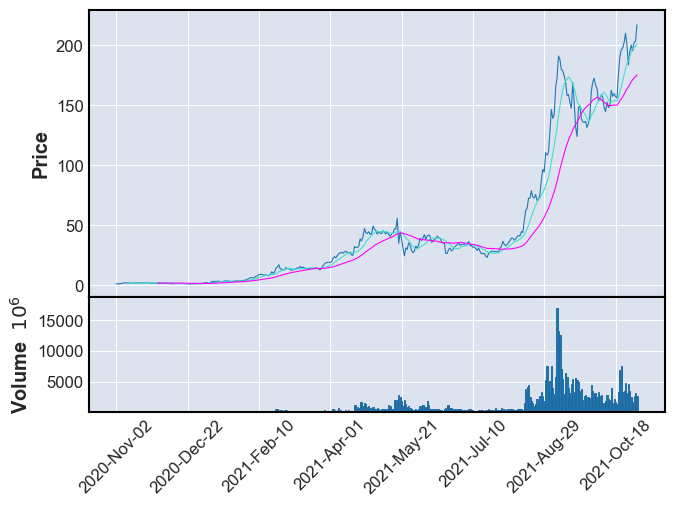

In [38]:
#try mplfinance
import mplfinance as mpf

mpf.plot(split['SOL1-USD'],type = 'line',volume = True,mav = (10,30))

# Python Widgets for plots

In [154]:
@interact (Tickers = tickers, Plot_Type = ['ohlc','line','hollow_and_filled','renko','pnf'])


def PlotIt(Tickers,Plot_Type):
    mpf.plot(sample_dict[Tickers],type = Plot_Type,volume = False,figratio = (100,40),style = 'yahoo')
    mpf.plot(sample_dict[Tickers],type = Plot_Type,volume = True,mav = 3,figratio = (100,40),style = 'yahoo',title = Tickers + ' Plot With Moving Average')

interactive(children=(Dropdown(description='Tickers', options=('SOL1-USD', 'BTC-USD', 'ETH-USD', '1INCH-USD', …